In [19]:
import pandas as pd
import os
import khtools
import warnings
import matplotlib.pyplot as plt
import networkx as nx

ksize = 21
moltype = 'DNA'

ignore_abundance = True
downsample = False

In [20]:
coral_transcriptome_data = pd.read_csv("/Users/pranathivemuri/czbiohub/coral_transcriptome_data_compare_dna_ignore_abundance_k21.csv")
similarities = pd.DataFrame(coral_transcriptome_data)
coral_transcriptome_data2 = pd.read_csv("/Users/pranathivemuri/czbiohub/coral_transcriptome_data_compare_dna_k21.csv")
similarities2 = pd.DataFrame(coral_transcriptome_data)
pd.util.testing.assert_frame_equal(similarities, similarities2)

print(similarities.shape)
similarities.head()

(49, 49)


,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15873X20.fastq.gz,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15941X28.fastq.gz,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15941X43.fastq.gz,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15941X16.fastq.gz,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15941X26.fastq.gz,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15873X47.fastq.gz,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15873X33.fastq.gz,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15941X54.fastq.gz,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15941X17.fastq.gz,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15941X2.fastq.gz,...,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15873X21.fastq.gz,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15941X55.fastq.gz,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15941X5.fastq.gz,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15941X15.fastq.gz,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15941X48.fastq.gz,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15873X30.fastq.gz,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15941X31.fastq.gz,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15941X41.fastq.gz,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15941X21.fastq.gz,/mnt/ibm_lg/pranathi/sourmash-data/coral_data/Copy of 15873X31.fastq.gz
0,1.000,0.268,0.306,0.278,0.272,0.286,0.292,0.260,0.310,0.262,...,0.290,0.296,0.272,0.268,0.278,0.274,0.254,0.286,0.294,0.162
1,0.268,1.000,0.332,0.388,0.306,0.268,0.270,0.344,0.346,0.330,...,0.276,0.324,0.332,0.274,0.332,0.274,0.310,0.282,0.334,0.172
2,0.306,0.332,1.000,0.342,0.340,0.280,0.276,0.352,0.352,0.350,...,0.274,0.366,0.320,0.276,0.358,0.276,0.350,0.306,0.354,0.164
3,0.278,0.388,0.342,1.000,0.346,0.272,0.270,0.348,0.340,0.336,...,0.264,0.324,0.336,0.290,0.344,0.282,0.336,0.288,0.318,0.162
4,0.272,0.306,0.340,0.346,1.000,0.256,0.274,0.350,0.322,0.322,...,0.276,0.332,0.320,0.272,0.330,0.262,0.312,0.294,0.302,0.156


In [21]:
gnomex_ids = []
for column in similarities.columns:
    gnomex_ids.append(os.path.basename(column).replace("Copy of ", "").replace(".fastq.gz", ""))
similarities.columns = similarities.index = gnomex_ids
similarities.head()

,15873X20,15941X28,15941X43,15941X16,15941X26,15873X47,15873X33,15941X54,15941X17,15941X2,...,15873X21,15941X55,15941X5,15941X15,15941X48,15873X30,15941X31,15941X41,15941X21,15873X31
15873X20,1.000,0.268,0.306,0.278,0.272,0.286,0.292,0.260,0.310,0.262,...,0.290,0.296,0.272,0.268,0.278,0.274,0.254,0.286,0.294,0.162
15941X28,0.268,1.000,0.332,0.388,0.306,0.268,0.270,0.344,0.346,0.330,...,0.276,0.324,0.332,0.274,0.332,0.274,0.310,0.282,0.334,0.172
15941X43,0.306,0.332,1.000,0.342,0.340,0.280,0.276,0.352,0.352,0.350,...,0.274,0.366,0.320,0.276,0.358,0.276,0.350,0.306,0.354,0.164
15941X16,0.278,0.388,0.342,1.000,0.346,0.272,0.270,0.348,0.340,0.336,...,0.264,0.324,0.336,0.290,0.344,0.282,0.336,0.288,0.318,0.162
15941X26,0.272,0.306,0.340,0.346,1.000,0.256,0.274,0.350,0.322,0.322,...,0.276,0.332,0.320,0.272,0.330,0.262,0.312,0.294,0.302,0.156


In [22]:
coral_transcriptome_metadata = pd.read_csv(
    "/Users/pranathivemuri/czbiohub/Copy of Astroides_meta_forOlga2.csv")
coral_transcriptome_metadata.columns = coral_transcriptome_metadata.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print(coral_transcriptome_metadata.shape)
coral_transcriptome_metadata.head()


(115, 24)


,population,sample_id,sites,general_sampling_date,experiment,gnomex_id,sequencing,cave_ph?,growth_t0-t1_=_growth_may_17-june_17,growth_t0-t2_=_growth_may_17-sept_17,...,growth_t0-t2b_=_may_18-sept_18,%necrosis_t0_=_may_2017,%necrosis_t1_=_june_2017,%_necrosis_t2_=_sept_2017,%_necrosis_t3_=_march_2018,%_necrosis_t4_=_april_2018,%_necrosis_t5_=_may_2018,%_necrosis_t1b_=_june_2018,%_necrosis_t2b_=_sept_2018,unnamed:_23
0,Grotto Mago,GM01,preliminary sampling,Oct-16,Background GM,14283X1,PE 125,low,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Punta Vico,PV03,preliminary sampling,Oct-16,Background PV,14283X10,PE 125,ambient,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Grotto Mago,GM02,preliminary sampling,Oct-16,Background GM,14283X2,PE 125,low,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Grotto Mago,GM03,preliminary sampling,Oct-16,Background GM,14283X3,PE 125,low,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Grotto Mago,GM04,preliminary sampling,Oct-16,Background GM,14283X4,PE 125,low,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
coral_transcriptome_metadata_filtered = coral_transcriptome_metadata[
    coral_transcriptome_metadata.gnomex_id.isin(gnomex_ids)]
print(coral_transcriptome_metadata_filtered.shape)
coral_transcriptome_metadata_filtered.index = coral_transcriptome_metadata_filtered.gnomex_id
coral_transcriptome_metadata_filtered.head()

(49, 24)


,population,sample_id,sites,general_sampling_date,experiment,gnomex_id,sequencing,cave_ph?,growth_t0-t1_=_growth_may_17-june_17,growth_t0-t2_=_growth_may_17-sept_17,...,growth_t0-t2b_=_may_18-sept_18,%necrosis_t0_=_may_2017,%necrosis_t1_=_june_2017,%_necrosis_t2_=_sept_2017,%_necrosis_t3_=_march_2018,%_necrosis_t4_=_april_2018,%_necrosis_t5_=_may_2018,%_necrosis_t1b_=_june_2018,%_necrosis_t2b_=_sept_2018,unnamed:_23
gnomex_id,,,,,,,,,,,,,,,,,,,,,
15873X20,San Pancrazio 4m,SP_Bck3_0918,Background 2m,Sep-18,Background SP 2m,15873X20,SE 125,ambient,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15873X21,Punta Vico 4m,PV_Bck3_0918,Background 2m,Sep-18,Background PV 2m,15873X21,SE 125,ambient,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15873X22,Grotta Mago,GM_Bck2_0518,Background,May-18,Background GM,15873X22,SE 125,low,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15873X24,San Pancrazio,Spa_01_0518,SP to SP,May-18,Transplants: SP to SP,15873X24,SE 125,ambient,0.0,0.1,...,NaN,0.0,0.0,0.0,5.0,0.0,0.0,NaN,NaN,NaN
15873X26,San Pancrazio,SP_Bck1_0518,Background,May-18,Background SP,15873X26,SE 125,ambient,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# gnomex_id, population, cave_ph seem
# important from first discussion with Olga
# Clustering according to them may be useful

In [25]:
color_cols = ['population', 'cave_ph?']
palette_names = ['Set2', 'husl']
palettes = dict(zip(color_cols, palette_names))
palettes

{'population': 'Set2', 'cave_ph?': 'husl'}

CONSTANTS IN SIGNATURE SIMILARITY CALCULATION  molecule=DNA_ksize=21_ignore-abundance=True
CPU times: user 416 ms, sys: 6.25 ms, total: 422 ms
Wall time: 427 ms


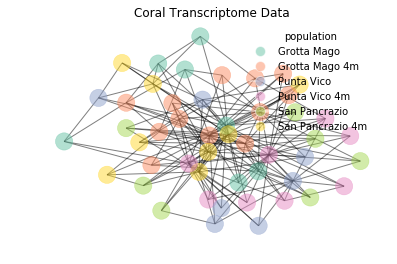

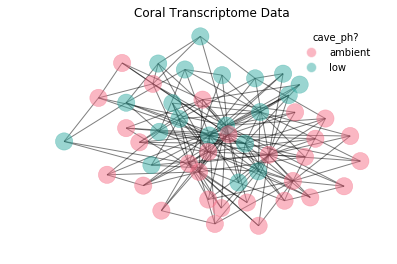

In [26]:
%%time

n_neighbors = 5
figure_folder = '/Users/pranathivemuri/czbiohub/coral_data/n_hashes=500/'
figure_prefix = f'molecule={moltype}_ksize={ksize}_ignore-abundance={ignore_abundance}'
print("CONSTANTS IN SIGNATURE SIMILARITY CALCULATION ", figure_prefix)
title = 'Coral Transcriptome Data'

key = f'k{ksize}_without_abundance_neighbors{n_neighbors}'
g, pos = khtools.knn.build_graph_and_plot(similarities, coral_transcriptome_metadata_filtered, n_neighbors,
                                          color_cols, palettes, figure_folder, figure_prefix, title)